In [1]:
import numpy
import pandas
import toyplot.pdf

The file [RayCasting.csv](RayCasting.csv) contains the mesurements for ray casting with VTK-m. For the measurements taken with VTK-m I have listed measurements for all runs. There are also some measurements taken from Matt Larsen's previous paper. For these numbers, we only have an aggregated value for each entry.

The data are collected on two different devices. Those labeled "K40" were run on an NVIDIA K40 GPU. The VTK-m runs were done on the LLNL "Surface" machine and the other runs (from Larsen's paper) were done on the TACC "Maverick" machine. Those labeled "Xeon E5" were all run on "Maverick". They are using two Xeon E5-2680 v2 Ivy Bridge processors, each with 10 physical cores (so 20 physical cores all total). Note that Larsens previous paper fails to mention that there are 2 processors (implying their are only one, which is not true).

In [2]:
raw_data = pandas.read_csv('RayCasting.csv')
#raw_data

Aggregate all runs with the same device, dataset, and algorithm to a single value. I would prefer to show the independent values since there is some varience, but I do not have the full data from the earlier runs, so it would be a confusing comparison.

In [3]:
data = raw_data.pivot_table(index=['Device', 'Data Set', 'Algorithm']).reset_index()
#data

Pandas by default sorts everything alphabetically. However, I would like the order a bit different. I would like the data sets grouped by type and roughly by size, and I would like the algorithm implementations ordered by reference implementation first then EAVL then VTK-m.

As far as I know, pandas does not have a way to specify the order of strings in a sort. Instead, I am creating some auxiliary arrays that are numbered in the order I want and then sorting on those.

In [4]:
dataset_order = ['LT_350K', 'LT_372K',
                 'RM_350K', 'RM_650K', 'RM_970K', 'RM_1.7M', 'RM_3.2M',
                 'Seismic']
dataset_sort = pandas.Series(numpy.empty(len(data.index)))
for index in xrange(0, len(dataset_order)):
    dataset_sort[data['Data Set']==dataset_order[index]] = index
data['dataset_sort'] = dataset_sort

algorithm_order = ['OptiX Prime', 'Embree', 'EAVL', 'VTK-m']
algorithm_sort = pandas.Series(numpy.empty(len(data.index)))
for index in xrange(0, len(algorithm_order)):
    algorithm_sort[data['Algorithm']==algorithm_order[index]] = index
data['algorithm_sort'] = algorithm_sort

data.sort_values(['Device', 'dataset_sort', 'algorithm_sort'], inplace=True)
data.drop(['dataset_sort', 'algorithm_sort'], axis=1, inplace=True)
data

Device Data Set    Algorithm  Millions of Rays Per Second
1       K40  LT_350K  OptiX Prime                   357.600000
0       K40  LT_350K         EAVL                   150.800000
2       K40  LT_350K        VTK-m                   164.524539
4       K40  LT_372K  OptiX Prime                   322.400000
3       K40  LT_372K         EAVL                   124.700000
5       K40  LT_372K        VTK-m                   140.780667
13      K40  RM_350K  OptiX Prime                   436.500000
12      K40  RM_350K         EAVL                   197.500000
14      K40  RM_350K        VTK-m                   200.767394
16      K40  RM_650K  OptiX Prime                   420.400000
15      K40  RM_650K         EAVL                   172.900000
17      K40  RM_650K        VTK-m                   166.019222
19      K40  RM_970K  OptiX Prime                   347.100000
18      K40  RM_970K         EAVL                   152.800000
20      K40  RM_970K        VTK-m                   163.544122
7       K40  RM_1.7M  OptiX Prime                   266.800000
6       K40  RM_1.7M         EAVL                   136.600000
8       K40  RM_1.7M        VTK-m                   148.814613
10      K40  RM_3.2M  OptiX Prime                   264.500000
9       K40  RM_3.2M         EAVL                   124.800000
11      K40  RM_3.2M        VTK-m                   134.541060
22      K40  Seismic  OptiX Prime                   267.800000
21      K40  Seismic         EAVL                   106.300000
23      K40  Seismic        VTK-m                   119.374312
25  Xeon E5  LT_350K       Embree                    51.900000
24  Xeon E5  LT_350K         EAVL                    27.700000
26  Xeon E5  LT_350K        VTK-m                    38.534859
28  Xeon E5  LT_372K       Embree                    56.500000
27  Xeon E5  LT_372K         EAVL                    26.100000
29  Xeon E5  LT_372K        VTK-m                    36.038520
37  Xeon E5  RM_350K       Embree                    64.800000
36  Xeon E5  RM_350K         EAVL                    33.300000
38  Xeon E5  RM_350K        VTK-m                    47.768135
40  Xeon E5  RM_650K       Embree                    65.900000
39  Xeon E5  RM_650K         EAVL                    35.600000
41  Xeon E5  RM_650K        VTK-m                    49.125256
43  Xeon E5  RM_970K       Embree                    59.100000
42  Xeon E5  RM_970K         EAVL                    29.300000
44  Xeon E5  RM_970K        VTK-m                    41.017221
31  Xeon E5  RM_1.7M       Embree                    52.400000
30  Xeon E5  RM_1.7M         EAVL                    27.000000
32  Xeon E5  RM_1.7M        VTK-m                    37.810865
34  Xeon E5  RM_3.2M       Embree                    48.400000
33  Xeon E5  RM_3.2M         EAVL                    28.300000
35  Xeon E5  RM_3.2M        VTK-m                    33.936912
46  Xeon E5  Seismic       Embree                    43.200000
45  Xeon E5  Seismic         EAVL                    25.200000
47  Xeon E5  Seismic        VTK-m                    34.455214

Make pretty tables for the paper. The paper will have side-by-side tables showing the GPU and CPU implementations. We will do these separately and place them in the document.

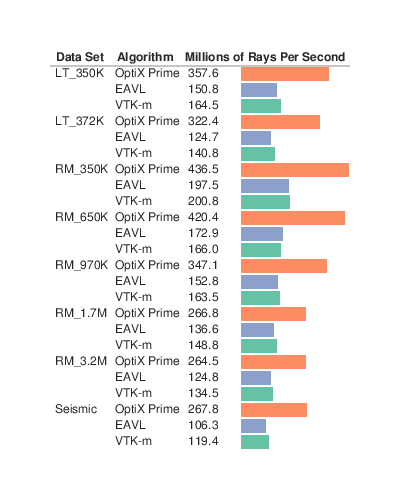

In [5]:
table_data = data[data['Device']=='K40'].drop('Device', axis=1)
table_data['barplot'] = table_data['Millions of Rays Per Second']

canvas = toyplot.Canvas(width=400, height=500)
table = canvas.table(table_data)

# Generally I do not want vertical lines, but they can be handy when resizing columns.
#table.grid.vlines[...] = "single"

table.column(2).format = toyplot.format.FloatFormatter('{:.1f}')

table.column(0).width = 60
table.column(1).width = 70
table.column(2).width = 60

# Make the last column, which we reserved as 'barplot' a bar plot.
axes = table.body.column(3).merge().axes(show=False, padding=1)
# In future versions of toyplot it will be easier to specify categorical colors
# using an array of categories.
colormap = toyplot.color.CategoricalMap()
colors = table_data['Algorithm'][::-1].replace({'OptiX Prime':1,
                                                'Embree':1,
                                                'EAVL':2,
                                                'VTK-m':0})
axes.bars(table_data['barplot'][::-1], along='y', color=(numpy.array(colors),colormap))

merged_cell = table.header.cell(0, 2, colspan=2).merge()
merged_cell.data = 'Millions of Rays Per Second'
merged_cell.align = 'left'

# The table row indices are really hierarchical, but toyplot does not understand
# hierarchical index columns at this time, so fake it by merging those cells.
# We happen to know they are grouped by 3's, so we can do it in a for loop.
for data_set_index in xrange(0, len(table_data.index)/3):
    table_index = data_set_index*3
    merged_cell = table.body.cell(table_index, 0, rowspan=3).merge()
    merged_cell.data = table_data['Data Set'].iloc[table_index]
    merged_cell.row_offset = -16
    
toyplot.pdf.render(canvas, 'RayCastingTimesGPU.pdf')

canvas

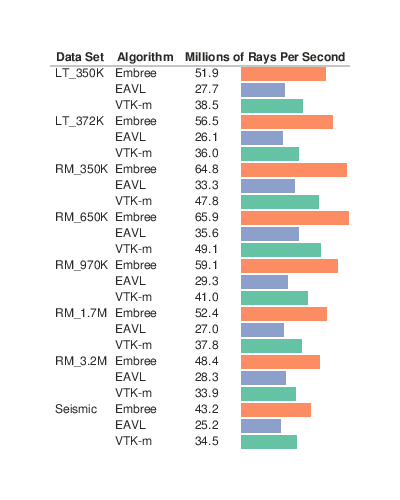

In [6]:
table_data = data[data['Device']=='Xeon E5'].drop('Device', axis=1)
table_data['barplot'] = table_data['Millions of Rays Per Second']

canvas = toyplot.Canvas(width=400, height=500)
table = canvas.table(table_data)

# Generally I do not want vertical lines, but they can be handy when resizing columns.
#table.grid.vlines[...] = "single"

table.column(2).format = toyplot.format.FloatFormatter('{:.1f}')

table.column(0).width = 60
table.column(1).width = 70
table.column(2).width = 60

# Make the last column, which we reserved as 'barplot' a bar plot.
axes = table.body.column(3).merge().axes(show=False, padding=1)
# In future versions of toyplot it will be easier to specify categorical colors
# using an array of categories.
colormap = toyplot.color.CategoricalMap()
colors = table_data['Algorithm'][::-1].replace({'OptiX Prime':1,
                                                'Embree':1,
                                                'EAVL':2,
                                                'VTK-m':0})
axes.bars(table_data['barplot'][::-1], along='y', color=(numpy.array(colors),colormap))

merged_cell = table.header.cell(0, 2, colspan=2).merge()
merged_cell.data = 'Millions of Rays Per Second'
merged_cell.align = 'left'

# The table row indices are really hierarchical, but toyplot does not understand
# hierarchical index columns at this time, so fake it by merging those cells.
# We happen to know they are grouped by 3's, so we can do it in a for loop.
for data_set_index in xrange(0, len(table_data.index)/3):
    table_index = data_set_index*3
    merged_cell = table.body.cell(table_index, 0, rowspan=3).merge()
    merged_cell.data = table_data['Data Set'].iloc[table_index]
    merged_cell.row_offset = -16
    
toyplot.pdf.render(canvas, 'RayCastingTimesCPU.pdf')

canvas